In [82]:

import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [83]:
# Step 1: Load the datasets
income = pd.read_csv("https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/clean_EU_income.csv")
waste = pd.read_csv("https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/filtered_waste_per_capita.csv")

In [84]:
# Reshape data from wide to long format
income_long = income.melt(id_vars=["Unnamed: 0"], var_name="Year", value_name="Income")
waste_long = waste.melt(id_vars=["Country"], var_name="Year", value_name="Waste")


In [85]:
# Merge datasets on Country and Year
income_long.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
data = pd.merge(income_long, waste_long, on=["Country", "Year"], how="inner")

number_of_countries = data['Country'].nunique()
print(f"The number of unique countries in the dataset is: {number_of_countries}")
data

The number of unique countries in the dataset is: 26


,Country,Year,Income,Waste
0,Belgium,2014,21705.0,0.484672
1,Bulgaria,2014,3311.0,0.376963
2,Czechia,2014,7622.0,0.310165
3,Denmark,2014,27861.0,0.636289
4,Germany,2014,19733.0,0.456714
...,...,...,...,...
229,Slovakia,2022,8819.0,0.477938
230,Finland,2022,26541.0,0.301988
231,Sweden,2022,26738.0,0.410816
232,Norway,2022,39206.0,0.412204


In [86]:
# Convert variables to numeric and handle missing values
data["Income"] = pd.to_numeric(data["Income"], errors="coerce")
data["Waste"] = pd.to_numeric(data["Waste"], errors="coerce")
data

,Country,Year,Income,Waste
0,Belgium,2014,21705.0,0.484672
1,Bulgaria,2014,3311.0,0.376963
2,Czechia,2014,7622.0,0.310165
3,Denmark,2014,27861.0,0.636289
4,Germany,2014,19733.0,0.456714
...,...,...,...,...
229,Slovakia,2022,8819.0,0.477938
230,Finland,2022,26541.0,0.301988
231,Sweden,2022,26738.0,0.410816
232,Norway,2022,39206.0,0.412204


In [87]:
# Set a multi-level index for panel data
data = data.set_index(['Country', 'Year'])

# Ensure the index is set correctly
print(data.index.is_unique)  # Should return True
data

True


,,Income,Waste
Country,Year,,
Belgium,2014,21705.0,0.484672
Bulgaria,2014,3311.0,0.376963
Czechia,2014,7622.0,0.310165
Denmark,2014,27861.0,0.636289
Germany,2014,19733.0,0.456714
...,...,...,...
Slovakia,2022,8819.0,0.477938
Finland,2022,26541.0,0.301988
Sweden,2022,26738.0,0.410816


In [95]:
print(data.columns)
print(data.index.names)
data = data.reset_index()  # Reset index to access the 'Year' column
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert Year to numeric
data = data.set_index(['Country', 'Year'])  # Set index back
print(data.index.get_level_values('Year').dtype)

Index(['Income', 'Waste'], dtype='object')
['Country', 'Year']
int64


In [96]:
# Fit a panel regression model with fixed effects
model = PanelOLS.from_formula('Waste ~ Income + EntityEffects + TimeEffects', data=data)
results = model.fit()

# Print results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0100
Estimator:                   PanelOLS   R-squared (Between):              0.2484
No. Observations:                 234   R-squared (Within):               0.0737
Date:                Thu, Nov 21 2024   R-squared (Overall):              0.2469
Time:                        14:31:16   Log-likelihood                    446.30
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.0001
Entities:                          26   P-value                           0.1589
Avg Obs:                       9.0000   Distribution:                   F(1,199)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             2.0001
                            

In [98]:
data

,,Income,Waste
Country,Year,,
Belgium,2014,21705.0,0.484672
Bulgaria,2014,3311.0,0.376963
Czechia,2014,7622.0,0.310165
Denmark,2014,27861.0,0.636289
Germany,2014,19733.0,0.456714
...,...,...,...
Slovakia,2022,8819.0,0.477938
Finland,2022,26541.0,0.301988
Sweden,2022,26738.0,0.410816


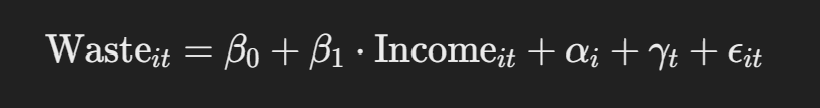

Statistical Significance
P-value:
0.1589
0.1589
The p-value for the Income coefficient is not statistically significant (
𝑝
>
0.05
p>0.05).
This indicates that the relationship between Income and Waste is not strong enough to conclude there is a meaningful effect.